### Phase 4 Project: Movie Recommendation System

#### Project Team: Group 2

- Rose Kyalo
- Angel Linah Atungire
- Oscar Mulei


#### Overview
In today's dynamic digital marketplace, recommendation systems efficiently bridge the gap between buyers and a diverse array of items by analyzing user behavior and preferences. These systems serve to streamline the shopping experience by suggesting personalized options, effectively assisting sellers in meeting customer needs and significantly boosting sales and satisfaction.

#### Business Understanding
The project's goal is to develop a movie recommendation system that recommends the best five films based on user ratings. The technology will assess user preferences and offer personalized recommendations using collaborative filtering techniques. The project's primary goal is to create a recommender system, a subset of artificial intelligence that predicts user preferences and recommends movies that the user might love. To automatically estimate user preferences, collaborative filtering will be used.

#### Business Problem
Company A, a renowned player in the movie production industry, is keen to optimize its promotional strategies for a diverse portfolio of films. They've sought our expertise to engineer a robust movie recommendation system. This system aims to deliver tailor-made movie suggestions to their audience, ultimately amplifying user engagement and fueling successful promotional endeavors.

#### Objective

The primary objective of this system is to analyze and understand user behavior and preferences through their movie rating history. Using this information, the system will:

1. Identify patterns in user ratings.
2. Compare and contrast these patterns with those of other users.
3. Generate personalized movie recommendations that resonate with each user's specific interests.

#### Data Source

The data for this project will be sourced from the GroupLens Research Project, specifically the MovieLens dataset, available at [GroupLens](https://grouplens.org/datasets/movielens/latest/). This comprehensive dataset includes:

- User ratings: A collection of movie ratings provided by users, which is the cornerstone of our collaborative filtering model.
- Movie details: Information on various movies, including genres, release dates, and more, which aids in understanding the context of user preferences.
- Links: References to other databases, which could be useful for enriching our dataset with additional movie information.
- Tags: User-generated tags for movies, offering insights into the nuanced preferences of users.

#### Methodology

The development of the Movie Recommendation System will follow these steps:

1. **Data Collection and Preprocessing**: Gathering the MovieLens data and preparing it for analysis. This step includes cleaning the data, handling missing values, and structuring it in a way that's conducive to our analysis.
2. **Exploratory Data Analysis (EDA)**: Conducting an initial exploration of the data to uncover patterns, anomalies, or trends that could influence our recommendation model.
3. **Model Development**: Implementing collaborative filtering algorithms, such as user-based or item-based filtering, to develop the recommendation model.
4. **Model Evaluation and Tuning**: Assessing the model's performance using appropriate metrics and making adjustments to improve accuracy and relevance of the recommendations.
5. **User Interface (Optional)**: Creating a simple user interface where users can input their ratings and receive movie recommendations. This would enhance the usability of our system.

#### Expected Outcomes

The expected outcome is a robust, user-friendly Movie Recommendation System that:

- Accurately predicts user preferences.
- Enhances user engagement by providing relevant movie suggestions.
- Is scalable and adaptable to an expanding user base and evolving movie datasets.

#### Future Scope

This project can be extended to include:

- Integration with real-time data for current movie trends.
- Incorporation of additional user information for more nuanced recommendations.
- Deployment of the model in a web or mobile application for wider accessibility.


---
### Data Collection and Preprocessing

In [1]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets # Building an interactive search box with Jupyter
from IPython.display import display # Building an interactive search box with Jupyter

In [2]:
# load the dataset
links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv") # Dataset used to build the recommendation system
movies = pd.read_csv("Data/movies.csv") # # Dataset used to build the movies search engine 

# Display the first few rows of each dataframe to understand their structure
(links.head(), tags.head(), ratings.head(), movies.head())

(   movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       2    60756     will ferrell  1445714992
 3       2    89774     Boxing story  1445715207
 4       2    89774              MMA  1445715200,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II

In [3]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# verify and correct data types, if necessary. 
print("Movies DataFrame Info:")
movies.info()

print("\nRatings DataFrame Info:")
ratings.info()

print("\nLinks DataFrame Info:")
links.info()

print("\nTags DataFrame Info:")
tags.info()


Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Links DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

In [5]:
# The data types seem appropriate for most columns. 
# However, we might want to convert the timestamp columns in ratings.csv and tags.csv to a more readable date-time format. 
# This conversion will make the data more interpretable for analysis.

# Convert timestamp to datetime in ratings.csv and tags.csv
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Display the updated data types for these two datasets
updated_data_types = {
    "ratings.csv": ratings.dtypes,
    "tags.csv": tags.dtypes
}

updated_data_types

{'ratings.csv': userId                int64
 movieId               int64
 rating              float64
 timestamp    datetime64[ns]
 dtype: object,
 'tags.csv': userId                int64
 movieId               int64
 tag                  object
 timestamp    datetime64[ns]
 dtype: object}

In [6]:
# Checking for missing values in the DataFrames
print("Missing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Links DataFrame:")
print(links.isnull().sum())

print("\nMissing Values in Tags DataFrame:")
print(tags.isnull().sum())

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [7]:
# handling the missing values in links data
# decided to delete the rows with the missing data, since it is only 0.082% of the data.
links.dropna(inplace=True)

In [8]:
# Check for duplicates in each dataset
duplicates = {
    "movies.csv": movies.duplicated().sum(),
    "ratings.csv": ratings.duplicated().sum(),
    "tags.csv": tags.duplicated().sum(),
    "links.csv": links.duplicated().sum()
}

duplicates

{'movies.csv': 0, 'ratings.csv': 0, 'tags.csv': 0, 'links.csv': 0}

In [9]:
# For the movies data, we'll split the genres into a list for easier analysis later on
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [10]:
# Cleaning movie titles using Python's regular expressions.

import re

# Define a function to clean a movie title.
def clean_title(title):
    # Use regular expression substitution to remove characters that are not letters, digits, or spaces.
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    # Return the cleaned title.
    return title

In [11]:
movies["clean_title"] = movies["title"].apply(clean_title)

In [12]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",Jumanji 1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",No Game No Life Zero 2017
9739,193585,Flint (2017),[Drama],Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",Bungo Stray Dogs Dead Apple 2018


#### Data Preprocessing Summary

##### Ratings Data (`ratings`)
- **Missing Values**: No missing values.
- **Timestamp Conversion**: Timestamps have been converted to a readable date format.

##### Movies Data (`movies`)
- **Missing Values**: No missing values.
- **Genre Processing**: The genres have been split into lists for easier analysis.

##### Links Data (`links`)
- **Missing Values**: There are some missing values in the `tmdbId` column.
- **Note**: decided to delete the rows with the missing data, since it is only 0.082% of the data.

##### Tags Data (`tags`)
- **Missing Values**: No missing values.
- **Timestamp Conversion**: Timestamps have been converted to a readable format.

---
### Exploratory Data Analysis (EDA)

In this phase, we'll explore the datasets to gain insights that can guide our model development. We'll look at the distribution of ratings, the number of movies and users, and conduct a genre analysis.

In [13]:
movies_and_ratings = pd.merge(ratings, movies, on ='movieId')

In [14]:
movies_and_ratings.head()

,userId,movieId,rating,timestamp,title,genres,clean_title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995


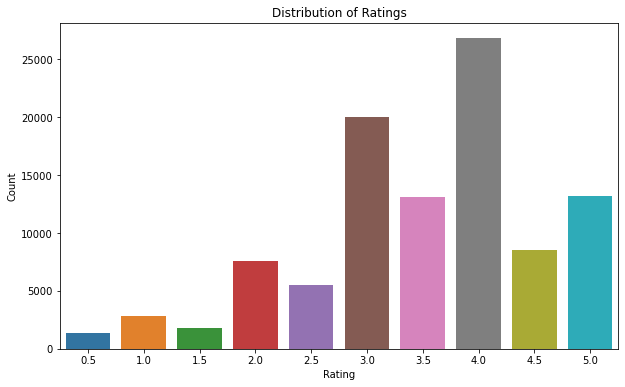

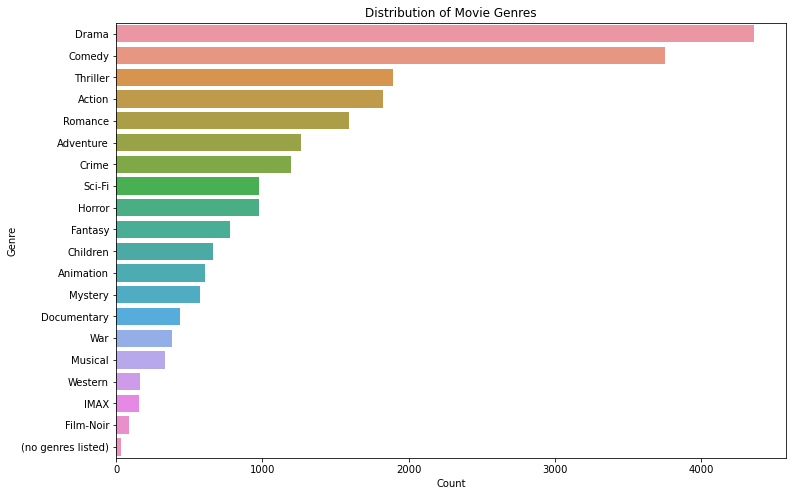

(610,
 9724,
 Drama        4361
 Comedy       3756
 Thriller     1894
 Action       1828
 Romance      1596
 Adventure    1263
 Crime        1199
 Sci-Fi        980
 Horror        978
 Fantasy       779
 Name: genre, dtype: int64)

In [15]:
# Exploratory Data Analysis

# Analysis of ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Number of unique users and movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

# Analysis of genre distribution
all_genres = sum(movies['genres'], [])
genres_df = pd.DataFrame(all_genres, columns=['genre'])
genre_counts = genres_df['genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

num_users, num_movies, genre_counts.head(10)

#### Exploratory Data Analysis (EDA) Summary

##### Ratings Distribution

- The distribution shows that users tend to give higher ratings.
- A significant number of ratings are concentrated at 4.0.

##### Number of Unique Users and Movies


- Number of Users: 610
- Number of Movies: 9724


##### Genre Distribution

- The most common genres in the dataset are Drama and Comedy.
- This suggests a wide variety of tastes among the users, which can be beneficial for a recommendation system.

---
### Model Development

 ##### Step 1. Creating a TF-IDF(Term Frequency- Inverse Term Frequency.)
 
This code is preparing a TF-IDF representation of the movie titles in the `movies` DataFrame, considering both individual words and pairs of consecutive words. This TF-IDF matrix can then be used for various purposes like information retrieval, text analysis, or as part of a machine learning pipeline.

In [16]:
# Initialize the TfidfVectorizer
# 'ngram_range=(1, 2)' configures the vectorizer to consider both single words (unigrams) and pairs of consecutive words (bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the 'clean_title' column of the 'movies' DataFrame into a TF-IDF matrix
# This process involves two main steps: 'fitting' and 'transforming'
# 'fitting' refers to learning the vocabulary of the 'clean_title' column
# 'transforming' converts the titles into a numerical format based on their TF-IDF values
tfidf = vectorizer.fit_transform(movies["clean_title"])


 ##### Step 2. Creating a search function: content-based recommendation system
 
 The `search` function in the provided code exemplifies a content-based recommendation system for movies in natural language processing. It takes a movie title as input, preprocesses it using a `clean_title` function, and then converts it into a TF-IDF vector using a pre-fitted `TfidfVectorizer` instance. The function computes the cosine similarity between this vector and a dataset's TF-IDF matrix, identifies the top five most similar movies based on this similarity, and returns these movies in descending order of similarity. This process enables the identification and recommendation of movies that are most similar in content to the user's input.

In [17]:
# Define the search function
def search(title):
    # Step 1: Clean the input title
    # Assuming there is a predefined function 'clean_title' that preprocesses the title
    title = clean_title(title)

    # Step 2: Transform the cleaned title into a TF-IDF vector
    # 'vectorizer' is assumed to be a pre-fitted TfidfVectorizer instance
    query_vec = vectorizer.transform([title])

    # Step 3: Compute the cosine similarity between the query vector and the TF-IDF matrix
    # 'tfidf' is assumed to be the TF-IDF matrix of the dataset
    similarity = cosine_similarity(query_vec, tfidf).flatten()

    # Step 4: Find indices of the top 5 most similar titles
    # '-5' indicates that we want the indices of the 5 largest values
    indices = np.argpartition(similarity, -5)[-5:]

    # Step 5: Retrieve and order the top 5 similar titles
    # 'movies' is assumed to be a DataFrame containing movie data
    # '.iloc[::-1]' reverses the order to start with the most similar title
    results = movies.iloc[indices].iloc[::-1]
    
    # Return the search results
    return results

##### Step 3. Building an interactive search 
We build interactive movie search tool within a Jupyter Notebook. It utilizes `ipywidgets` to create a text input widget (`movie_input`) for users to enter movie titles. Additionally, an output widget (`movie_list`) is established to display the results of the search. The core functionality is driven by the `on_type` function, which is triggered whenever the value in the movie title input widget changes. This function clears any previous output, retrieves the new title entered by the user, and, if the title is longer than five characters, it executes a `search` function to find and display relevant movie titles.

In [18]:
# Create a text input widget for movie titles
movie_input = widgets.Text(
    value='Toy Story',  # Default text to display in the input box
    description='Movie Title:',  # Label for the input box
    disabled=False  # Allow the user to modify the text
)

# Create an output widget to display the search results
movie_list = widgets.Output()

# Define a function to be called when the user types in the movie_input widget
def on_type(data):
    with movie_list:  # Context manager for the output widget
        movie_list.clear_output()  # Clear previous output
        title = data["new"]  # Extract the new title from the event data
        if len(title) > 5:  # Check if the title length is more than 5 characters
            display(search(title))  # Call the 'search' function and display its results

# Attach the on_type function to the movie_input widget
# The function is triggered every time the value of movie_input changes
movie_input.observe(on_type, names='value')

# Display the movie_input and movie_list widgets
display(movie_input, movie_list)


Text(value='Toy Story', description='Movie Title:')

Output()